#ANN Image Classification

In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# We will load the already inbuilt dataset available in keras
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data() #to load the data from the module
X_train=X_train/255.0
X_test=X_test/255.0 #Normalaising since all the values will lie in between them hence converting between 0 and 1

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)), #Here the shape always has to be columns X third dimension thing. First we got to reshape into a single dimension vector following which we give the input shape 
      tf.keras.layers.Dense(128,activation='relu'), #For image classification, first layer should be relu
      tf.keras.layers.Dropout(0.2), # The removal of neurons randomly that are'nt needed
      tf.keras.layers.Dense(10,activation='softmax') #The number of outputs should be first argument with the activation function
])

In [ ]:
#Here we specify the optimizer which is adam-> Gradient Descent
#We then use the loss as sparse categorical cross entropy which specifies the type of loss function
#We then specify the type of metrics to be used
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [ ]:
#Here we fit/train the model on the basis on the data
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4790 - accuracy: 0.8595 - val_loss: 0.1374 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1571 - accuracy: 0.9539 - val_loss: 0.1005 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1145 - accuracy: 0.9648 - val_loss: 0.0840 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9707 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9760 - val_loss: 0.0757 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0758 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.0709 - val_accuracy:

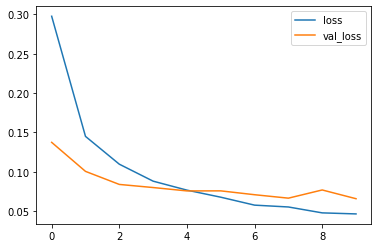

In [ ]:
#We will make some plots to see how our model performed. Here we plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

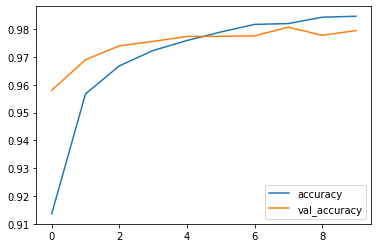

In [ ]:
#Here we will plot thee accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 973    1    1    1    0    1    1    1    1    0]
 [   0 1126    3    2    0    1    2    1    0    0]
 [   3    4 1007    3    2    0    3    4    5    1]
 [   0    0    4  994    0    5    0    3    3    1]
 [   0    0    1    0  964    0    5    2    0   10]
 [   2    0    0    4    1  872    6    1    5    1]
 [   3    2    0    1    3    3  943    0    3    0]
 [   2    5   16    2    0    0    0  992    2    9]
 [   6    1    2    3    1    3    2    3  949    4]
 [   3    4    0    6   11    4    0    4    2  975]]


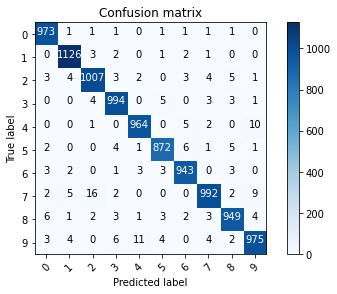

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [ ]:
pred=model.predict(X_test).argmax(axis=1)
print(confusion_matrix(y_test,pred))

[[ 973    1    1    1    0    1    1    1    1    0]
 [   0 1126    3    2    0    1    2    1    0    0]
 [   3    4 1007    3    2    0    3    4    5    1]
 [   0    0    4  994    0    5    0    3    3    1]
 [   0    0    1    0  964    0    5    2    0   10]
 [   2    0    0    4    1  872    6    1    5    1]
 [   3    2    0    1    3    3  943    0    3    0]
 [   2    5   16    2    0    0    0  992    2    9]
 [   6    1    2    3    1    3    2    3  949    4]
 [   3    4    0    6   11    4    0    4    2  975]]


True Value: 8 Predicted Value: 4


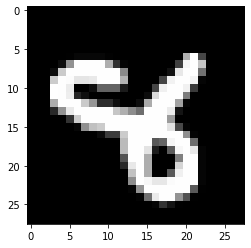

In [ ]:
# Showing where we went wrong
missclassified_idx=np.where(pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(X_test[i],cmap='gray')
print("True Value: {} Predicted Value: {}".format(y_test[i],pred[i]))

#ANN Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# We will create our own data this time to have a look on how this model works
N=10000
X=np.random.random((N,2))*6-3 # We normalise it in between -3 and 3
y=np.cos(2*X[:,0])+np.cos(2*X[:,1]) # We have the function
print(X.shape)

(10000, 2)


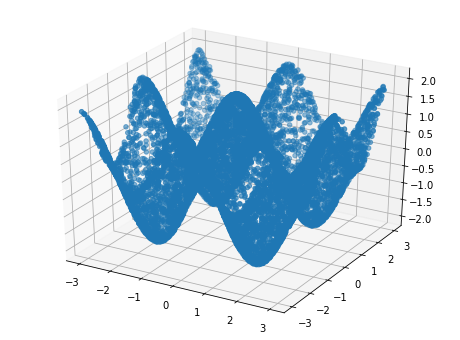

In [ ]:
# Plot it
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

In [ ]:
# Now we will train the model
model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
      tf.keras.layers.Dense(1)
])

In [ ]:
# Now we tune in the hyper paramteres
opt=tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=opt,loss='mse')
r=model.fit(X,y,epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 934us/step - loss: 0.9274
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.8152
Epoch 3/100
313/313 [==============================] - 0s 996us/step - loss: 0.7692
Epoch 4/100
313/313 [==============================] - 0s 968us/step - loss: 0.7474
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7101
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6708
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6107
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.5164
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4084
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2938
Epoch 11/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 12/100
313/313 [==============================] - 0s 958us/step - loss: 0.1106
Epoch

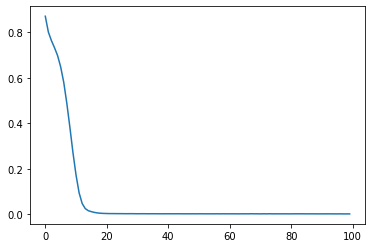

In [ ]:
# We will plot some graphs 
plt.plot(r.history['loss'],label='loss')

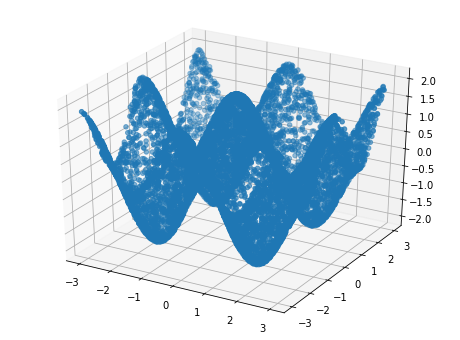

In [ ]:
# we will plot the predicting surface
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)

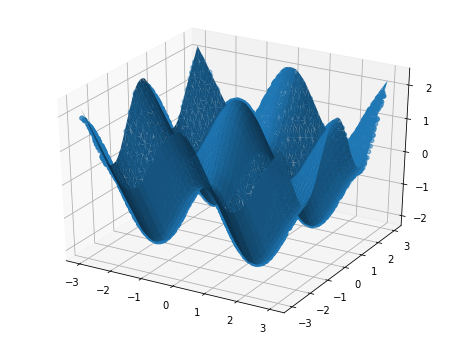

In [ ]:
# we will plot the predicting surface
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)




# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()